## Libraries

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from warnings import filterwarnings as filt 
import os 
import re 

filt('ignore')
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = (15, 9)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**setting the root path...**

In [ ]:
### path to datasets for jaabir 
#root = '/content/drive/MyDrive/carbon_fp'
### for others 
root = "/content/drive/MyDrive/carbon_fp"

os.chdir(root)
!pwd

/content/drive/.shortcut-targets-by-id/1DgRO5rnQXFelTUgGehdbK37oSYScbLQg/carbon_fp


## Reading The data

In [ ]:
data = [i for i in os.listdir('datasets') if 'csv' in i]
data

['public_cfp.csv', 'tpr_cfp.csv', 'sus_cfp.csv']

In [ ]:
df_sus = pd.read_csv(os.path.join('datasets', data[2]))
df_sus = df_sus.rename(columns = {'carbon_footprint_' : 'cfp'})
df_pub = pd.read_csv(os.path.join('datasets', data[0]))
df_sus = df_sus.rename(columns = {'carbon_footprint_' : 'cfp'})
df_tpr = pd.read_csv(os.path.join('datasets', data[1]))

In [ ]:
df_sus.head()

,food_commodity_group,food_commodity_typology,food_commodity_item,cfp,publication_year,country,region,wfp
0,AGRICULTURAL PROCESSED,BEER,BEER GLASS BOTTLE,0.4200,2012.0,Europe,Europe,0
1,AGRICULTURAL PROCESSED,BEER,BEER GLASS BOTTLE,0.5680,2016.0,Italy,Mediterranean area,0
2,AGRICULTURAL PROCESSED,BEER,BEER GLASS BOTTLE,0.6660,2016.0,Italy,Mediterranean area,0
3,AGRICULTURAL PROCESSED,BEER,BEER GLASS BOTTLE,0.8420,2016.0,UK,N Europe,0
4,AGRICULTURAL PROCESSED,BEER,BEER GLASS BOTTLE,0.9605,2018.0,Italy,Mediterranean area,0


In [ ]:
df_pub.head()

,pcf_id,year_of_reporting,product_name,product_detail,company,country,company's_gics_industry_group,company's_gics_industry,company's_sector,product_weight,product's_carbon_footprint,carbon_intensity
0,10056,2014,Frosted Flakes(R) Cereal,"Frosted Flakes(R), 23 oz., Produced in Lancast...",Kellogg Company,USA,"Food, Beverage & Tobacco",Food Products,Food & Beverage,0.7485,2.00,2.67
1,10056,2015,"Frosted Flakes, 23 oz, produced in Lancaster, ...",Cereal,Kellogg Company,USA,Food & Beverage Processing,Not used for 2015 reporting,Food & Beverage,0.7485,2.00,2.67
2,10222,2013,Office Chair,Field not included in 2013 data,KNOLL INC,USA,Capital Goods,Building Products,Comm. equipm. & capital goods,20.6800,72.54,3.51
3,10261,2017,Multifunction Printers,bizhub C458,"Konica Minolta, Inc.",Japan,Technology Hardware & Equipment,"Electronic Equipment, Instruments & Components","Computer, IT & telecom",110.0000,1488.00,13.53
4,10261,2017,Multifunction Printers,bizhub C558,"Konica Minolta, Inc.",Japan,Technology Hardware & Equipment,"Electronic Equipment, Instruments & Components","Computer, IT & telecom",110.0000,1818.00,16.53


In [ ]:
df_tpr.head()

,food_code,description,kgco2e/kg,product
0,12042,"Soya milk, plain ...",0.250838,soya milk
1,12131,"Cheese, Brie ...",18.584000,cheese
2,12134,"Cheese, Cheddar, average ...",18.584000,cheese
3,12147,"Cottage cheese, plain ...",18.584000,cheese
4,12154,"Cheese, Edam ...",18.584000,cheese


> **shape of the datasets**

In [ ]:
print(f'Shape of sus data : {df_sus.shape}')
print(f'Shape of pub data : {df_pub.shape}')
print(f'Shape of tpr data : {df_tpr.shape}')

Shape of sus data : (3349, 8)
Shape of pub data : (866, 12)
Shape of tpr data : (289, 4)


## Data exploring

In [ ]:
def print_grp(vals1, vals2 = []):
  for i in vals1:
    print(i)
  print()
  print('-'.center(70, '='))
  print()
  for i in vals2:
    print(i)

In [ ]:
print_grp(df_sus.food_commodity_group.unique(), df_pub["company's_sector"].unique())

AGRICULTURAL PROCESSED
ANIMAL HUSBANDRY
CROPS
FISHING

==================================-===================================

Food & Beverage
Comm. equipm. & capital goods
Computer, IT & telecom
Chemicals
Construction & commercial materials
Home durables, textiles, & equipment
Packaging for consumer goods
Automobiles & components


In [ ]:
print_grp(df_sus.food_commodity_group.unique(), df_pub["company's_gics_industry_group"].unique())

AGRICULTURAL PROCESSED
ANIMAL HUSBANDRY
CROPS
FISHING

==================================-===================================

Food, Beverage & Tobacco
Food & Beverage Processing
Capital Goods
Technology Hardware & Equipment
Materials
Consumer Durables & Apparel
Textiles, Apparel, Footwear and Luxury Goods
Chemicals
Semiconductors & Semiconductor Equipment
Software & Services
Commercial & Professional Services
Utilities
Gas Utilities
Telecommunication Services
Electrical Equipment and Machinery
Containers & Packaging
Retailing
Mining - Iron, Aluminum, Other Metals
Media
Automobiles & Components
Pharmaceuticals, Biotechnology & Life Sciences
Tires
Trading Companies & Distributors and Commercial Services & Supplies
Forest and Paper Products - Forestry, Timber, Pulp and Paper, Rubber
Consumer Durables, Household and Personal Products
Energy
Food & Staples Retailing
Household & Personal Products
Tobacco
Semiconductors & Semiconductors Equipment


In [ ]:
df_sus['food_commodity_group'] = 'Food & Beverage'
df_sus = df_sus.rename(columns = {'publication_year' : 'year_of_reporting'})
df_sus.head()

,food_commodity_group,food_commodity_typology,food_commodity_item,cfp,year_of_reporting,country,region,wfp
0,Food & Beverage,BEER,BEER GLASS BOTTLE,0.4200,2012.0,Europe,Europe,0
1,Food & Beverage,BEER,BEER GLASS BOTTLE,0.5680,2016.0,Italy,Mediterranean area,0
2,Food & Beverage,BEER,BEER GLASS BOTTLE,0.6660,2016.0,Italy,Mediterranean area,0
3,Food & Beverage,BEER,BEER GLASS BOTTLE,0.8420,2016.0,UK,N Europe,0
4,Food & Beverage,BEER,BEER GLASS BOTTLE,0.9605,2018.0,Italy,Mediterranean area,0


In [ ]:
df_sus[df_sus.year_of_reporting.str.contains('\(')]

,food_commodity_group,food_commodity_typology,food_commodity_item,cfp,year_of_reporting,country,region,wfp
2644,Food & Beverage,RICE,RICE,0.4300,2001 (2011),Netherlands,N Europe,0
2719,Food & Beverage,STARCHY TUBERS,POTATO,0.4010,2001 (2010),Netherlands,N Europe,0
2720,Food & Beverage,STARCHY TUBERS,POTATO,0.4140,2001 (2010),Netherlands,N Europe,0
2735,Food & Beverage,VEGETABLES GREENHOUSE NOT HEATED,TOMATO (g),0.2214,2005 (2010),Spain,Mediterranean area,0
2771,Food & Beverage,VEGETABLES HEATED GREENHOUSE,CUCUMBER (G),4.5100,2006 (2011),Denmark,N Europe,0
2811,Food & Beverage,VEGETABLES HEATED GREENHOUSE,TOMATO (G),3.5900,2006 (2010),Denmark,N Europe,0
2817,Food & Beverage,VEGETABLES HEATED GREENHOUSE,TOMATO (G),5.0600,2006 (2010),Denmark,N Europe,0
2895,Food & Beverage,VEGETABLES OPENFIELD,CARROT,0.2620,2006 (2010),Denmark,N Europe,0
2978,Food & Beverage,VEGETABLES OPENFIELD,ONION,0.5220,2006 (2010),Denmark,N Europe,0
3149,Food & Beverage,FISH,HERRING,1.1340,2001 (2011),Netherlands,N Europe,0


In [ ]:
sorted(df_sus.year_of_reporting.unique())

['1998.0',
 '1999.0',
 '2000.0',
 '2001 (2010)',
 '2001 (2011)',
 '2001.0',
 '2002.0',
 '2003.0',
 '2004.0',
 '2005 (2010)',
 '2005.0',
 '2006 (2010)',
 '2006 (2011)',
 '2006.0',
 '2007.0',
 '2008.0',
 '2009.0',
 '2010.0',
 '2011.0',
 '2012.0',
 '2013.0',
 '2014.0',
 '2015.0',
 '2016.0',
 '2017.0',
 '2018.0',
 '2019.0']

## Removing brackets and restructring

In [ ]:
def remove_brac(year):
  year = re.sub(r'( )?\(.*\)( )?', '', year)
  return int(year.split('.')[0])

In [ ]:
df_sus['year_of_reporting'] = df_sus['year_of_reporting'].apply(remove_brac)
df_sus.head()

,food_commodity_group,food_commodity_typology,food_commodity_item,cfp,year_of_reporting,country,region,wfp
0,Food & Beverage,BEER,BEER GLASS BOTTLE,0.4200,2012,Europe,Europe,0
1,Food & Beverage,BEER,BEER GLASS BOTTLE,0.5680,2016,Italy,Mediterranean area,0
2,Food & Beverage,BEER,BEER GLASS BOTTLE,0.6660,2016,Italy,Mediterranean area,0
3,Food & Beverage,BEER,BEER GLASS BOTTLE,0.8420,2016,UK,N Europe,0
4,Food & Beverage,BEER,BEER GLASS BOTTLE,0.9605,2018,Italy,Mediterranean area,0


## Distribution of year_of_reporting column 

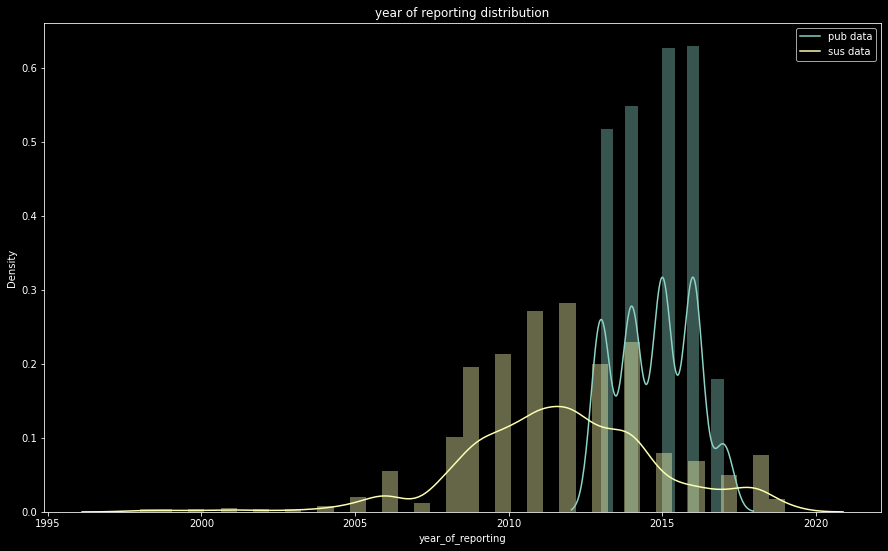

In [ ]:
plt.figure()
sns.distplot(df_pub.year_of_reporting)
sns.distplot(df_sus.year_of_reporting)
plt.title('year of reporting distribution')
plt.legend(['pub data', 'sus data']);

In [ ]:
print_grp(df_sus.country.unique(), df_pub.country.unique())

Europe
Italy
UK
Chile
USA
Mediterranean area
France
India
Austria
Denmark
Sweden
World
Portugal
Spain
Ecuador
Costa Rica, processed in europe
Tanzania
Mexico, Guatemala, Nicaragua, El Salvador, Colombia
Brasil, Colombia, Vietnam
Germany
Germany, Netherlands
Netherlands
Malta
Brazil
China
Australia
Canada
Argentina
Greece
Turkey
Cyprus
Malaysia
Mexico
Mauritius
Thailand
Luxembourg
Italy-Spain
Finland
E Europe
Lithuania
Germany, Poland and Denmark
Russia
Slovakia
EU 27
Ireland
Romania
Bulgaria
Latvia
Norway
Other imported
Usa
Belgium
Canada (west)
USA Mid-West
W Europe
Czech republic
Uruguay
Slovenia
Canada (east)
Japan
Hungary
Poland
Oceania
Estonia
Columbia
Africa (near east and north)
N America
Venezuela
Asia (east and south-east)
Africa (subsaharan)
Asia (south)
global average
world average
N Europe
C Europe
S America (Latin America and Caribean)
New Zealand
Switzerland
Ukraine
Moldavia
Serbia
Israel
South Africa
Croatia
Kazakhistan
Czech Republic
Perù
Morocco
E Asia
Belarus
Uganda
P

## Data Cleaning

In [ ]:
df_sus[df_sus.country == 'Germany, Poland and Denmark']

,food_commodity_group,food_commodity_typology,food_commodity_item,cfp,year_of_reporting,country,region,wfp
606,Food & Beverage,BEEF BONE FREE MEAT,BEEF BONE FREE MEAT,21.0000,2014,"Germany, Poland and Denmark",N Europe,0
782,Food & Beverage,BEEF MEAT WITH BONE,BEEF MEAT WITH BONE,14.6377,2014,"Germany, Poland and Denmark",N Europe,0


In [ ]:
def clean_cunts(df, col = 'country'):
  sdf = pd.DataFrame({}, columns = df.columns)
  data = df[df.country == 'Germany, Poland and Denmark']
  for _, rdf in data.iterrows():
    cunts = ['Germany','Poland','Denmark']
    for cunt in cunts:
      sdf.loc[sdf.shape[0]] = [cunt if i == 'Germany, Poland and Denmark' else i for i in rdf.values]
  return pd.concat([df.drop(data.index), sdf]).reset_index(drop = True)

In [ ]:
df_sus = clean_cunts(df_sus)
df_sus.head()

,food_commodity_group,food_commodity_typology,food_commodity_item,cfp,year_of_reporting,country,region,wfp
0,Food & Beverage,BEER,BEER GLASS BOTTLE,0.4200,2012,Europe,Europe,0
1,Food & Beverage,BEER,BEER GLASS BOTTLE,0.5680,2016,Italy,Mediterranean area,0
2,Food & Beverage,BEER,BEER GLASS BOTTLE,0.6660,2016,Italy,Mediterranean area,0
3,Food & Beverage,BEER,BEER GLASS BOTTLE,0.8420,2016,UK,N Europe,0
4,Food & Beverage,BEER,BEER GLASS BOTTLE,0.9605,2018,Italy,Mediterranean area,0


In [ ]:
df_pub.head()

,pcf_id,year_of_reporting,product_name,product_detail,company,country,company's_gics_industry_group,company's_gics_industry,company's_sector,product_weight,product's_carbon_footprint,carbon_intensity
0,10056,2014,Frosted Flakes(R) Cereal,"Frosted Flakes(R), 23 oz., Produced in Lancast...",Kellogg Company,USA,"Food, Beverage & Tobacco",Food Products,Food & Beverage,0.7485,2.00,2.67
1,10056,2015,"Frosted Flakes, 23 oz, produced in Lancaster, ...",Cereal,Kellogg Company,USA,Food & Beverage Processing,Not used for 2015 reporting,Food & Beverage,0.7485,2.00,2.67
2,10222,2013,Office Chair,Field not included in 2013 data,KNOLL INC,USA,Capital Goods,Building Products,Comm. equipm. & capital goods,20.6800,72.54,3.51
3,10261,2017,Multifunction Printers,bizhub C458,"Konica Minolta, Inc.",Japan,Technology Hardware & Equipment,"Electronic Equipment, Instruments & Components","Computer, IT & telecom",110.0000,1488.00,13.53
4,10261,2017,Multifunction Printers,bizhub C558,"Konica Minolta, Inc.",Japan,Technology Hardware & Equipment,"Electronic Equipment, Instruments & Components","Computer, IT & telecom",110.0000,1818.00,16.53


In [ ]:
print_grp(sorted(df_sus.food_commodity_typology.unique()), sorted(df_pub["company's_gics_industry_group"].unique()))

BEEF BONE FREE MEAT
BEEF MEAT WITH BONE
BEER
BISCUITS
BOTTLED WATER
BREAD
BREAD FROZEN
BREAKFAST CEREALS
BUFFALO BONE FREE MEAT
BUTTER
CHOCOLATE
COFFEE GREEN
COFFEE GROUND & PARCHMENT
COFFEE LIQUID
CRACKERS
CRISPBREAD
DRESSING
DRIED FRUIT
EDIBLE INSECTS
EGG PASTA
EGGS
FISH
FISH FROZEN
FISH PROCESSED
FRESH CHEESE
FRUIT FROZEN
FRUIT GREENHOUSE NOT HEATED
FRUIT HEATED GREENHOUSE
FRUIT IMPORTED
FRUIT JUICE (imported ingredients)
FRUIT JUICE LOCAL
FRUIT OPENFIELD
GRAIN FLOUR
GRAINS
HARD AND SEMI-HARD CHEESE
HONEY
ICE CREAM
KANGAROO MEAT
LAMB BONE FREE MEAT
LAMB MEAT WITH BONE
LEGUME FLOUR
LEGUMES
LEGUMES CANNED
LEGUMES FROZEN
LEGUMES NOT HEATED GREENHOUSE
MARGARINE
MILK
MUSHROOM
NUTS
NUTS COVERED WITH CHOCOLATE
NUTS PASTE
OIL
PASTA
PESTO
PORK BONE FREE MEAT
PORK CURED MEAT
PORK MEAT WITH BONE
POULTRY BONE FREE MEAT
POULTRY MEAT WITH BONE
RABBIT MEAT WITH BONE
RICE
SEEDS
SHELLFISH
SHELLFISH FROZEN
SNAILS
SPICIES
STARCHY TUBERS
SUGAR
SWEETS
TOMATO PUREE, PEELED, CHOPPED
TOMATO SAUCE
VEGETABLE

In [ ]:
comd_map =  """
BEEF BONE FREE MEAT
BEEF MEAT WITH BONE
BEER
BISCUITS
BOTTLED WATER
BREAD
BREAD FROZEN
BREAKFAST CEREALS
BUFFALO BONE FREE MEAT
BUTTER
CHOCOLATE
COFFEE GREEN
COFFEE GROUND & PARCHMENT
COFFEE LIQUID
CRACKERS
CRISPBREAD
DRESSING
DRIED FRUIT
EDIBLE INSECTS
EGG PASTA
EGGS
FISH
FISH FROZEN
FISH PROCESSED
FRESH CHEESE
FRUIT FROZEN
FRUIT GREENHOUSE NOT HEATED
FRUIT HEATED GREENHOUSE
FRUIT IMPORTED
FRUIT JUICE (imported ingredients)
FRUIT JUICE LOCAL
FRUIT OPENFIELD
GRAIN FLOUR
GRAINS
HARD AND SEMI-HARD CHEESE
HONEY
ICE CREAM
KANGAROO MEAT
LAMB BONE FREE MEAT
LAMB MEAT WITH BONE
LEGUME FLOUR
LEGUMES
LEGUMES CANNED
LEGUMES FROZEN
LEGUMES NOT HEATED GREENHOUSE
MARGARINE
MILK
MUSHROOM
NUTS
NUTS COVERED WITH CHOCOLATE
NUTS PASTE
OIL
PASTA
PESTO
PORK BONE FREE MEAT
PORK CURED MEAT
PORK MEAT WITH BONE
POULTRY BONE FREE MEAT
POULTRY MEAT WITH BONE
RABBIT MEAT WITH BONE
RICE
SEEDS
SHELLFISH
SHELLFISH FROZEN
SNAILS
SPICIES
STARCHY TUBERS
SUGAR
SWEETS
TOMATO PUREE, PEELED, CHOPPED
TOMATO SAUCE
VEGETABLES CANNED
VEGETABLES FROZEN
VEGETABLES GREENHOUSE NOT HEATED
VEGETABLES HEATED GREENHOUSE
VEGETABLES OPENFIELD
VEGETAL CREAM
VEGETAL MILK
VEGETAL PROTEINS 
VEGETAL YOGURT
WINE
YEAST COMPRESSED
YEAST DRIED
YEAST LIQUID
YOGURT """

for i in comd_map.split('\n'):
  print(f"'{i}' : ,")

'' : ,
'BEEF BONE FREE MEAT' : ,
'BEEF MEAT WITH BONE' : ,
'BEER' : ,
'BISCUITS' : ,
'BOTTLED WATER' : ,
'BREAD' : ,
'BREAD FROZEN' : ,
'BREAKFAST CEREALS' : ,
'BUFFALO BONE FREE MEAT' : ,
'BUTTER' : ,
'CHOCOLATE' : ,
'COFFEE GREEN' : ,
'COFFEE GROUND & PARCHMENT' : ,
'COFFEE LIQUID' : ,
'CRACKERS' : ,
'CRISPBREAD' : ,
'DRESSING' : ,
'DRIED FRUIT' : ,
'EDIBLE INSECTS' : ,
'EGG PASTA' : ,
'EGGS' : ,
'FISH' : ,
'FISH FROZEN' : ,
'FISH PROCESSED' : ,
'FRESH CHEESE' : ,
'FRUIT FROZEN' : ,
'FRUIT GREENHOUSE NOT HEATED' : ,
'FRUIT HEATED GREENHOUSE' : ,
'FRUIT IMPORTED' : ,
'FRUIT JUICE (imported ingredients)' : ,
'FRUIT JUICE LOCAL' : ,
'FRUIT OPENFIELD' : ,
'GRAIN FLOUR' : ,
'GRAINS' : ,
'HARD AND SEMI-HARD CHEESE' : ,
'HONEY' : ,
'ICE CREAM' : ,
'KANGAROO MEAT' : ,
'LAMB BONE FREE MEAT' : ,
'LAMB MEAT WITH BONE' : ,
'LEGUME FLOUR' : ,
'LEGUMES' : ,
'LEGUMES CANNED' : ,
'LEGUMES FROZEN' : ,
'LEGUMES NOT HEATED GREENHOUSE' : ,
'MARGARINE' : ,
'MILK' : ,
'MUSHROOM' : ,
'NUTS' : ,
'NUTS COVER

In [ ]:
comd_dict = {
'BEEF BONE FREE MEAT' : 'Food & Staples Retailing',
'BEEF MEAT WITH BONE' : 'Food & Staples Retailing',
'BEER' : 'Food & Beverage Processing',
'BISCUITS' : 'Food & Staples Retailing',
'BOTTLED WATER' : 'Food & Beverage Processing',
'BREAD' : 'Food & Staples Retailing',
'BREAD FROZEN' : 'Food & Staples Retailing',
'BREAKFAST CEREALS' : 'Food & Staples Retailing',
'BUFFALO BONE FREE MEAT' : 'Food & Staples Retailing',
'BUTTER' : 'Food & Staples Retailing',
'CHOCOLATE' : 'Food & Staples Retailing',
'COFFEE GREEN' : 'Food & Beverage Processing',
'COFFEE GROUND & PARCHMENT' : 'Food & Beverage Processing',
'COFFEE LIQUID' : 'Food & Beverage Processing',
'CRACKERS' : 'Food & Staples Retailing',
'CRISPBREAD' : 'Food & Staples Retailing',
'DRESSING' : 'Food & Staples Retailing',
'DRIED FRUIT' : 'Food & Staples Retailing',
'EDIBLE INSECTS' : 'Food & Staples Retailing',
'EGG PASTA' : 'Food & Staples Retailing',
'EGGS' : 'Food & Staples Retailing',
'FISH' : 'Food & Staples Retailing',
'FISH FROZEN' : 'Food & Staples Retailing',
'FISH PROCESSED' : 'Food & Staples Retailing',
'FRESH CHEESE' : 'Food & Staples Retailing',
'FRUIT FROZEN' : 'Food & Staples Retailing',
'FRUIT GREENHOUSE NOT HEATED' : 'Food & Staples Retailing',
'FRUIT HEATED GREENHOUSE' : 'Food & Staples Retailing',
'FRUIT IMPORTED' : 'Food & Staples Retailing',
'FRUIT JUICE (imported ingredients)' : 'Food & Beverage Processing',
'FRUIT JUICE LOCAL' : 'Food & Beverage Processing',
'FRUIT OPENFIELD' : 'Food & Staples Retailing',
'GRAIN FLOUR' : 'Food & Staples Retailing',
'GRAINS' : 'Food & Staples Retailing',
'HARD AND SEMI-HARD CHEESE' : 'Food & Staples Retailing',
'HONEY' : 'Food & Beverage Processing',
'ICE CREAM' : 'Food & Beverage Processing',
'KANGAROO MEAT' : 'Food & Staples Retailing',
'LAMB BONE FREE MEAT' : 'Food & Staples Retailing',
'LAMB MEAT WITH BONE' : 'Food & Staples Retailing',
'LEGUME FLOUR' : 'Food & Staples Retailing',
'LEGUMES' : 'Food & Staples Retailing',
'LEGUMES CANNED' : 'Food & Staples Retailing',
'LEGUMES FROZEN' : 'Food & Staples Retailing',
'LEGUMES NOT HEATED GREENHOUSE' : 'Food & Staples Retailing',
'MARGARINE' : 'Food & Staples Retailing',
'MILK' : 'Food & Beverage Processing',
'MUSHROOM' : 'Food & Staples Retailing',
'NUTS' : 'Food & Staples Retailing',
'NUTS COVERED WITH CHOCOLATE' : 'Food & Staples Retailing',
'NUTS PASTE' : 'Food & Staples Retailing',
'OIL' : 'Food & Staples Retailing',
'PASTA' : 'Food & Staples Retailing',
'PESTO' : 'Food & Staples Retailing',
'PORK BONE FREE MEAT' : 'Food & Staples Retailing',
'PORK CURED MEAT' : 'Food & Staples Retailing',
'PORK MEAT WITH BONE' : 'Food & Staples Retailing',
'POULTRY BONE FREE MEAT' : 'Food & Staples Retailing',
'POULTRY MEAT WITH BONE' : 'Food & Staples Retailing',
'RABBIT MEAT WITH BONE' : 'Food & Staples Retailing',
'RICE' : 'Food & Staples Retailing',
'SEEDS' : 'Food & Staples Retailing',
'SHELLFISH' : 'Food & Staples Retailing',
'SHELLFISH FROZEN' : 'Food & Staples Retailing',
'SNAILS' : 'Food & Staples Retailing',
'SPICIES' : 'Food & Staples Retailing',
'STARCHY TUBERS' : 'Food & Staples Retailing',
'SUGAR' : 'Food & Staples Retailing',
'SWEETS' : 'Food & Staples Retailing',
'TOMATO PUREE, PEELED, CHOPPED' : 'Food & Staples Retailing',
'TOMATO SAUCE' : 'Food & Staples Retailing',
'VEGETABLES CANNED' : 'Food & Staples Retailing',
'VEGETABLES FROZEN' : 'Food & Staples Retailing',
'VEGETABLES GREENHOUSE NOT HEATED' : 'Food & Staples Retailing',
'VEGETABLES HEATED GREENHOUSE' : 'Food & Staples Retailing',
'VEGETABLES OPENFIELD' : 'Food & Staples Retailing',
'VEGETAL CREAM' : 'Food & Staples Retailing',
'VEGETAL MILK' : 'Food & Beverage Processing',
'VEGETAL PROTEINS ' : 'Food & Staples Retailing',
'VEGETAL YOGURT' : 'Food & Staples Retailing',
'WINE' : 'Food & Beverage Processing',
'YEAST COMPRESSED' : 'Food & Staples Retailing',
'YEAST DRIED' : 'Food & Staples Retailing',
'YEAST LIQUID' : 'Food & Beverage Processing',
'YOGURT ' : 'Food & Staples Retailing',
}

In [ ]:
df_sus = df_sus.replace({"food_commodity_typology" : comd_dict})

In [ ]:
df_sus

,food_commodity_group,food_commodity_typology,food_commodity_item,cfp,year_of_reporting,country,region,wfp
0,Food & Beverage,Food & Beverage Processing,BEER GLASS BOTTLE,0.4200,2012,Europe,Europe,0
1,Food & Beverage,Food & Beverage Processing,BEER GLASS BOTTLE,0.5680,2016,Italy,Mediterranean area,0
2,Food & Beverage,Food & Beverage Processing,BEER GLASS BOTTLE,0.6660,2016,Italy,Mediterranean area,0
3,Food & Beverage,Food & Beverage Processing,BEER GLASS BOTTLE,0.8420,2016,UK,N Europe,0
4,Food & Beverage,Food & Beverage Processing,BEER GLASS BOTTLE,0.9605,2018,Italy,Mediterranean area,0
...,...,...,...,...,...,...,...,...
3348,Food & Beverage,Food & Staples Retailing,BEEF BONE FREE MEAT,21.0000,2014,Poland,N Europe,0
3349,Food & Beverage,Food & Staples Retailing,BEEF BONE FREE MEAT,21.0000,2014,Denmark,N Europe,0
3350,Food & Beverage,Food & Staples Retailing,BEEF MEAT WITH BONE,14.6377,2014,Germany,N Europe,0
3351,Food & Beverage,Food & Staples Retailing,BEEF MEAT WITH BONE,14.6377,2014,Poland,N Europe,0


In [ ]:
df_sus.columns = ['commodity_sector', 'commodity_industry', 'product_name', 'cfp', 'year_of_reporting', 'country/region', 'region', 'wfp']

In [ ]:
df_sus.drop(['region'], axis = 1, inplace = True)

## Defining all the necessary columns we need

In [ ]:
## product_name
## year of reporting
## company
## country
## commodity group
## commodity typology
## cfp
## product weight
## carbon intensity
## wfp

In [ ]:
df_pub.drop(['product_detail', "company's_gics_industry"], axis = 1, inplace = True)

In [ ]:
df_pub.head(2)

,pcf_id,year_of_reporting,product_name,company,country,company's_gics_industry_group,company's_sector,product_weight,product's_carbon_footprint,carbon_intensity
0,10056,2014,Frosted Flakes(R) Cereal,Kellogg Company,USA,"Food, Beverage & Tobacco",Food & Beverage,0.7485,2.0,2.67
1,10056,2015,"Frosted Flakes, 23 oz, produced in Lancaster, ...",Kellogg Company,USA,Food & Beverage Processing,Food & Beverage,0.7485,2.0,2.67


In [ ]:
df_sus.head(1)

,commodity_sector,commodity_industry,product_name,cfp,year_of_reporting,country/region,wfp
0,Food & Beverage,Food & Beverage Processing,BEER GLASS BOTTLE,0.42,2012,Europe,0


In [ ]:
df_pub.columns = ['id', 'year_of_reporting', 'product_name', 'company', 'country/region', 'commodity_industry','commodity_sector', 'product_weight', 'cfp', 'carbon_intensity']

In [ ]:
df_pub.head(2)

,id,year_of_reporting,product_name,company,country,commodity_industry,commodity_sector,product_weight,cfp,carbon_intensity
0,10056,2014,Frosted Flakes(R) Cereal,Kellogg Company,USA,"Food, Beverage & Tobacco",Food & Beverage,0.7485,2.0,2.67
1,10056,2015,"Frosted Flakes, 23 oz, produced in Lancaster, ...",Kellogg Company,USA,Food & Beverage Processing,Food & Beverage,0.7485,2.0,2.67


## Concatanating the 2 datasets to produce the final dataset

In [ ]:
df_final = pd.concat([df_pub, df_sus])

In [ ]:
df_final

,id,year_of_reporting,product_name,company,country/region,commodity_industry,commodity_sector,product_weight,cfp,carbon_intensity,wfp
0,10056.0,2014,Frosted Flakes(R) Cereal,Kellogg Company,USA,"Food, Beverage & Tobacco",Food & Beverage,0.7485,2.0000,2.67,NaN
1,10056.0,2015,"Frosted Flakes, 23 oz, produced in Lancaster, ...",Kellogg Company,USA,Food & Beverage Processing,Food & Beverage,0.7485,2.0000,2.67,NaN
2,10222.0,2013,Office Chair,KNOLL INC,USA,Capital Goods,Comm. equipm. & capital goods,20.6800,72.5400,3.51,NaN
3,10261.0,2017,Multifunction Printers,"Konica Minolta, Inc.",Japan,Technology Hardware & Equipment,"Computer, IT & telecom",110.0000,1488.0000,13.53,NaN
4,10261.0,2017,Multifunction Printers,"Konica Minolta, Inc.",Japan,Technology Hardware & Equipment,"Computer, IT & telecom",110.0000,1818.0000,16.53,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3348,NaN,2014,BEEF BONE FREE MEAT,NaN,Poland,Food & Staples Retailing,Food & Beverage,NaN,21.0000,NaN,0
3349,NaN,2014,BEEF BONE FREE MEAT,NaN,Denmark,Food & Staples Retailing,Food & Beverage,NaN,21.0000,NaN,0
3350,NaN,2014,BEEF MEAT WITH BONE,NaN,Germany,Food & Staples Retailing,Food & Beverage,NaN,14.6377,NaN,0
3351,NaN,2014,BEEF MEAT WITH BONE,NaN,Poland,Food & Staples Retailing,Food & Beverage,NaN,14.6377,NaN,0


In [ ]:
df_final.wfp.unique()

array([nan, 0], dtype=object)

In [ ]:
df_final.drop(['wfp'], axis = 1, inplace = True)

In [ ]:
df_final.product_name.dtype == 'O'

True

In [ ]:
df_final.year_of_reporting = df_final.year_of_reporting.astype(int)

In [ ]:
df_final.company = df_final.company.replace('nan', np.nan)

In [ ]:
for i in df_final.columns:
  if df_final[i].dtype == 'O' and i != 'company':
    try:
      df_final[i] = df_final[i].apply(lambda x : x.lower())
    except Exception as e:
      print(i)
      print(e)

In [ ]:
df_final

,id,year_of_reporting,product_name,company,country/region,commodity_industry,commodity_sector,product_weight,cfp,carbon_intensity
0,10056.0,2014,frosted flakes(r) cereal,Kellogg Company,usa,"food, beverage & tobacco",food & beverage,0.7485,2.0000,2.67
1,10056.0,2015,"frosted flakes, 23 oz, produced in lancaster, ...",Kellogg Company,usa,food & beverage processing,food & beverage,0.7485,2.0000,2.67
2,10222.0,2013,office chair,KNOLL INC,usa,capital goods,comm. equipm. & capital goods,20.6800,72.5400,3.51
3,10261.0,2017,multifunction printers,"Konica Minolta, Inc.",japan,technology hardware & equipment,"computer, it & telecom",110.0000,1488.0000,13.53
4,10261.0,2017,multifunction printers,"Konica Minolta, Inc.",japan,technology hardware & equipment,"computer, it & telecom",110.0000,1818.0000,16.53
...,...,...,...,...,...,...,...,...,...,...
3348,NaN,2014,beef bone free meat,NaN,poland,food & staples retailing,food & beverage,NaN,21.0000,NaN
3349,NaN,2014,beef bone free meat,NaN,denmark,food & staples retailing,food & beverage,NaN,21.0000,NaN
3350,NaN,2014,beef meat with bone,NaN,germany,food & staples retailing,food & beverage,NaN,14.6377,NaN
3351,NaN,2014,beef meat with bone,NaN,poland,food & staples retailing,food & beverage,NaN,14.6377,NaN


## Exporting the final data as csv for further eda

In [ ]:
df_final.to_csv('datasets/final_data.csv', index = False)